In [1]:
# import the usual suspects ...
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, plot_confusion_matrix, roc_auc_score, balanced_accuracy_score, mean_squared_error, r2_score
import itertools
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(123)
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

D:\Program Files\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\Program Files\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\Program Files\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Train/Test Split
X = pd.read_csv("X_.csv")
y = pd.read_csv("y_.csv")
    

In [3]:
from sklearn.model_selection import train_test_split

# split our data
x_train_cla, x_test_cla, y_train_cla, y_test_cla = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [4]:
from imblearn.over_sampling import RandomOverSampler
 
ros = RandomOverSampler(random_state=0)
x_train_cla, y_train_cla = ros.fit_resample(x_train_cla, y_train_cla)

In [5]:
# Scaling X using StandardScaler
# Only fit training data to avoid data leakage
scaler = StandardScaler()
x_train_cla = pd.DataFrame(scaler.fit_transform(x_train_cla), columns=list(x_train_cla.columns))
x_test_cla = pd.DataFrame(scaler.transform(x_test_cla), columns=list(x_test_cla.columns))
x_train_cla.head()

,Engine_Capacity_.CC.,Engine_Capacity_.CC..1,Vehicle_Type,Vehicle_Manoeuvre,Vehicle_Direction_To,Vehicle_Direction_From,Age_Band_of_Casualty,Day_of_Week,Year,Engine_Capacity_.CC..2,Engine_Capacity_.CC..3,Local_Authority_(District),Speed_limit_2,Speed_limit_3,Speed_limit_4,Daytime_2,Daytime_3,Daytime_4,Daytime_5,Number_of_Casualties_2,Number_of_Casualties_3,Number_of_Casualties_4,Number_of_Casualties_5,Age_of_Vehicle_2,Age_of_Vehicle_3,Age_of_Vehicle_4,Age_of_Vehicle_5
0,-0.153214,-0.153214,-0.026134,-0.805003,0.299620,-1.440713,2.003329,-1.018692,-0.060569,-0.153214,-0.153214,2.073709,1.092623,-0.800708,-0.417132,1.665958,-0.635384,-0.452696,-0.357247,1.713186,-0.406455,-0.310197,-0.353754,-0.278562,1.621369,-0.499539,-0.700518
1,0.073487,0.073487,-0.026134,0.578939,1.158496,-0.581190,-1.107715,0.442983,-0.748784,0.073487,0.073487,-0.845431,-0.915229,-0.800708,2.397323,-0.600255,1.573852,-0.452696,-0.357247,1.713186,-0.406455,-0.310197,-0.353754,-0.278562,1.621369,-0.499539,-0.700518
2,-0.208479,-0.208479,-0.026134,0.578939,1.587934,-0.151429,1.558894,-0.531467,-0.519379,-0.208479,-0.208479,0.330009,1.092623,-0.800708,-0.417132,1.665958,-0.635384,-0.452696,-0.357247,-0.583708,-0.406455,-0.310197,-0.353754,-0.278562,-0.616763,-0.499539,-0.700518
3,-0.286302,-0.286302,-0.026134,0.578939,-0.129818,1.567617,-0.663280,-1.505917,-0.978189,-0.286302,-0.286302,-0.331662,1.092623,-0.800708,-0.417132,-0.600255,-0.635384,2.208987,-0.357247,-0.583708,-0.406455,-0.310197,-0.353754,-0.278562,1.621369,-0.499539,-0.700518
4,-0.377659,-0.377659,-0.752396,0.578939,0.299620,-1.440713,1.114459,1.417433,0.857051,-0.377659,-0.377659,-0.417291,-0.915229,1.248894,-0.417132,1.665958,-0.635384,-0.452696,-0.357247,-0.583708,-0.406455,-0.310197,-0.353754,3.589866,-0.616763,-0.499539,-0.700518


### Logistic Regression

In [6]:
def plot_cf(y_true, y_pred, class_names=None, model_name=None):
    """Plots a confusion matrix"""
    fig, ax = plt.subplots(figsize=(12, 6))
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    #class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')
    plt.colorbar()
    plt.show()

Train: 0.5000046419685374
Test: 0.5421026232808724
              precision    recall  f1-score   support

       Fatal       0.52      0.65      0.58    933512
     Serious       0.40      0.25      0.31    933512
      Slight       0.54      0.59      0.56    933512

    accuracy                           0.50   2800536
   macro avg       0.49      0.50      0.48   2800536
weighted avg       0.49      0.50      0.48   2800536

              precision    recall  f1-score   support

       Fatal       0.06      0.66      0.11      6861
     Serious       0.20      0.25      0.22     44862
      Slight       0.89      0.59      0.71    233378

    accuracy                           0.54    285101
   macro avg       0.38      0.50      0.35    285101
weighted avg       0.76      0.54      0.62    285101



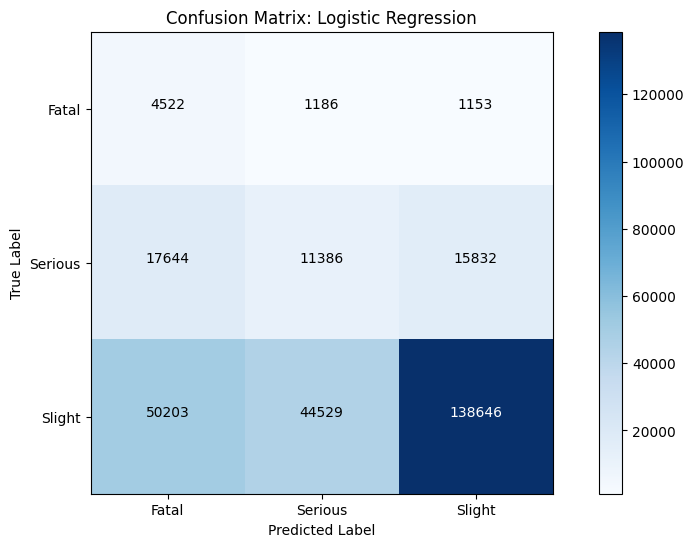

In [7]:
lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(x_train_cla, y_train_cla)
print("Train:", lr.score(x_train_cla, y_train_cla))
print("Test:", lr.score(x_test_cla, y_test_cla))

lr_y_preds_train = lr.predict(x_train_cla)
print(classification_report(y_train_cla, lr_y_preds_train, target_names=['Fatal', 'Serious','Slight']))

lr_y_preds_test = lr.predict(x_test_cla)
print(classification_report(y_test_cla, lr_y_preds_test, target_names=['Fatal', 'Serious','Slight']))
plot_cf(y_test_cla, lr_y_preds_test, model_name='Logistic Regression', class_names=['Fatal', 'Serious','Slight'])

Train: 0.5007355734759346
Test: 0.5352103289711365
              precision    recall  f1-score   support

       Fatal       0.52      0.63      0.57    933512
     Serious       0.40      0.30      0.34    933512
      Slight       0.54      0.58      0.56    933512

    accuracy                           0.50   2800536
   macro avg       0.49      0.50      0.49   2800536
weighted avg       0.49      0.50      0.49   2800536

              precision    recall  f1-score   support

       Fatal       0.06      0.63      0.12      6861
     Serious       0.20      0.30      0.24     44862
      Slight       0.89      0.58      0.70    233378

    accuracy                           0.54    285101
   macro avg       0.39      0.50      0.35    285101
weighted avg       0.76      0.54      0.61    285101



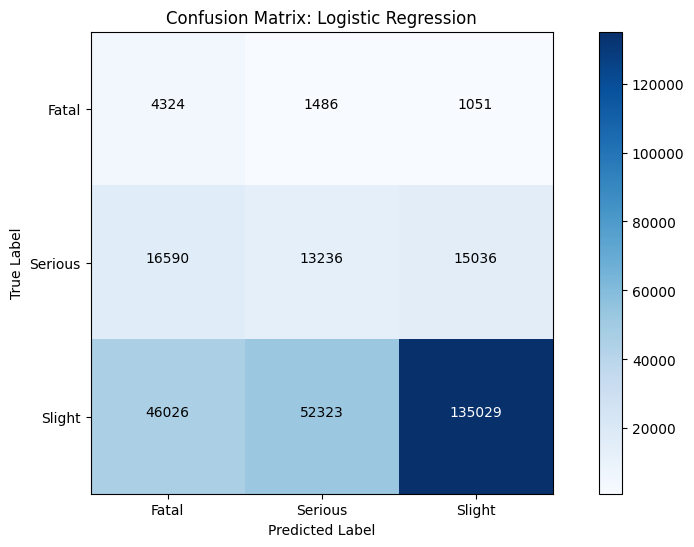

In [8]:
lr = LogisticRegression(solver='sag', random_state=42)
lr.fit(x_train_cla, y_train_cla)
print("Train:", lr.score(x_train_cla, y_train_cla))
print("Test:", lr.score(x_test_cla, y_test_cla))

lr_y_preds_train = lr.predict(x_train_cla)
print(classification_report(y_train_cla, lr_y_preds_train, target_names=['Fatal', 'Serious','Slight']))

lr_y_preds_test = lr.predict(x_test_cla)
print(classification_report(y_test_cla, lr_y_preds_test, target_names=['Fatal', 'Serious','Slight']))
plot_cf(y_test_cla, lr_y_preds_test, model_name='Logistic Regression', class_names=['Fatal', 'Serious','Slight'])

Train: 0.500725575389854
Test: 0.5351787612109393
              precision    recall  f1-score   support

       Fatal       0.52      0.63      0.57    933512
     Serious       0.40      0.30      0.34    933512
      Slight       0.54      0.58      0.56    933512

    accuracy                           0.50   2800536
   macro avg       0.49      0.50      0.49   2800536
weighted avg       0.49      0.50      0.49   2800536

              precision    recall  f1-score   support

       Fatal       0.06      0.63      0.12      6861
     Serious       0.20      0.30      0.24     44862
      Slight       0.89      0.58      0.70    233378

    accuracy                           0.54    285101
   macro avg       0.39      0.50      0.35    285101
weighted avg       0.76      0.54      0.61    285101



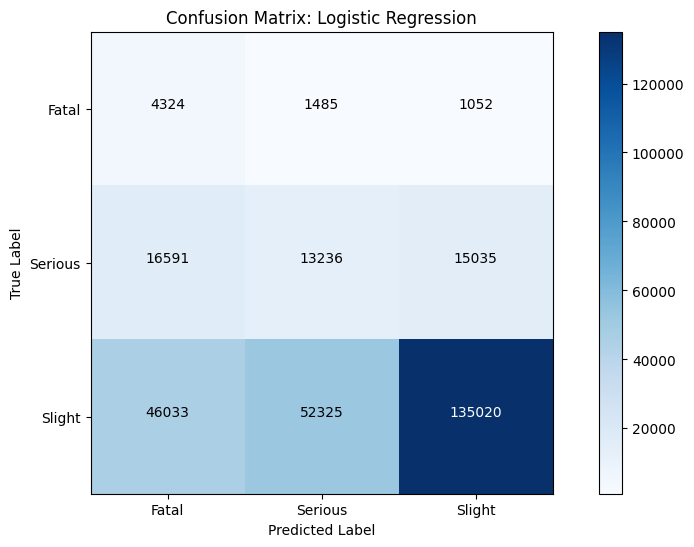

In [9]:
lr = LogisticRegression(solver='lbfgs', random_state=42)
lr.fit(x_train_cla, y_train_cla)
print("Train:", lr.score(x_train_cla, y_train_cla))
print("Test:", lr.score(x_test_cla, y_test_cla))

lr_y_preds_train = lr.predict(x_train_cla)
print(classification_report(y_train_cla, lr_y_preds_train, target_names=['Fatal', 'Serious','Slight']))

lr_y_preds_test = lr.predict(x_test_cla)
print(classification_report(y_test_cla, lr_y_preds_test, target_names=['Fatal', 'Serious','Slight']))
plot_cf(y_test_cla, lr_y_preds_test, model_name='Logistic Regression', class_names=['Fatal', 'Serious','Slight'])

Train: 0.5007305744328943
Test: 0.5352033139133149
              precision    recall  f1-score   support

       Fatal       0.52      0.63      0.57    933512
     Serious       0.40      0.30      0.34    933512
      Slight       0.54      0.58      0.56    933512

    accuracy                           0.50   2800536
   macro avg       0.49      0.50      0.49   2800536
weighted avg       0.49      0.50      0.49   2800536

              precision    recall  f1-score   support

       Fatal       0.06      0.63      0.12      6861
     Serious       0.20      0.30      0.24     44862
      Slight       0.89      0.58      0.70    233378

    accuracy                           0.54    285101
   macro avg       0.39      0.50      0.35    285101
weighted avg       0.76      0.54      0.61    285101



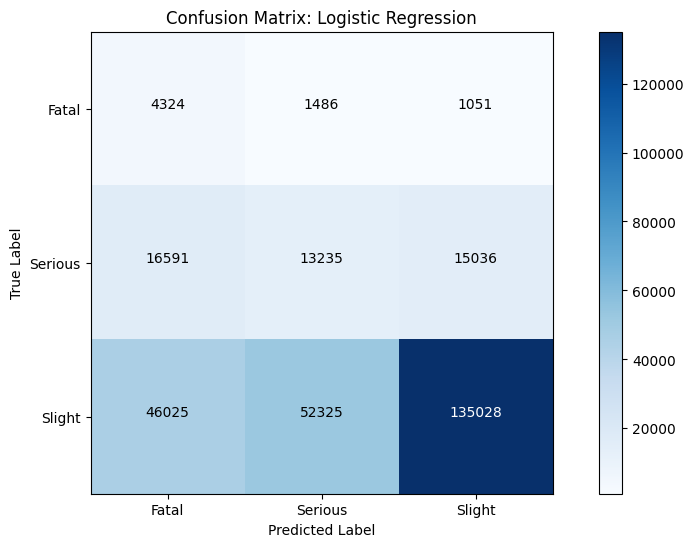

In [11]:
lr = LogisticRegression(solver='newton-cg', random_state=42)
lr.fit(x_train_cla, y_train_cla)
print("Train:", lr.score(x_train_cla, y_train_cla))
print("Test:", lr.score(x_test_cla, y_test_cla))

lr_y_preds_train = lr.predict(x_train_cla)
print(classification_report(y_train_cla, lr_y_preds_train, target_names=['Fatal', 'Serious','Slight']))

lr_y_preds_test = lr.predict(x_test_cla)
print(classification_report(y_test_cla, lr_y_preds_test, target_names=['Fatal', 'Serious','Slight']))
plot_cf(y_test_cla, lr_y_preds_test, model_name='Logistic Regression', class_names=['Fatal', 'Serious','Slight'])